In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Data/Sample - Superstore.csv', parse_dates=['Order Date','Ship Date'], encoding='ISO-8859-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Obtain monthly sales and daily sales

In [5]:
monthly_sales = pd.DataFrame(data.resample('M', on='Order Date')['Sales'].sum())
daily_sales = pd.DataFrame(data.resample('D', on='Order Date')['Sales'].sum())

In [6]:
#Check if there is data for every day.
daily_sales.reset_index()['Order Date'].value_counts().sum()

1458

#### Show time series data

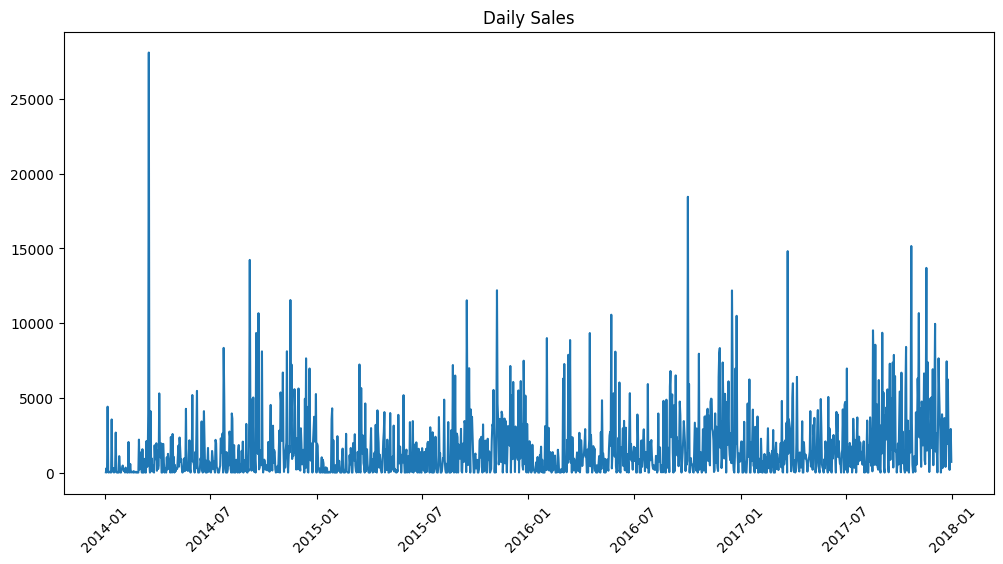

In [7]:
#check the overall daily time series.
plt.figure(figsize=(12,6))
plt.plot(daily_sales)
plt.xticks(rotation=45)
plt.title('Daily Sales')
plt.show()

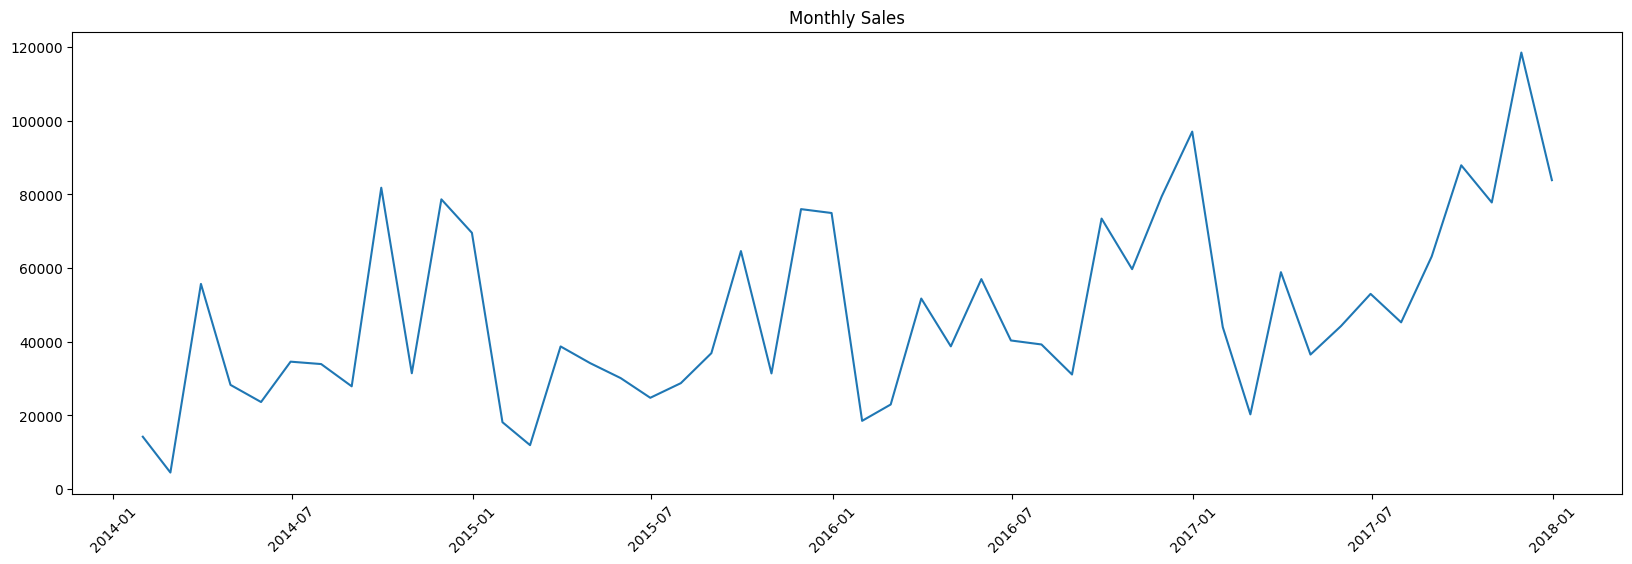

In [8]:
#check the overall monthly sales
plt.figure(figsize=(20,6))
plt.plot(monthly_sales['Sales'])
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.show()

## Differencing

In [9]:
data = data.sort_values('Order Date').reset_index(drop=True)

In [10]:
# First-order difference
daily_sales['diff_1'] =  daily_sales.diff(1)
monthly_sales['diff_1'] = monthly_sales.diff(1)


# Second-order difference
daily_sales['diff_2'] =  daily_sales['diff_1'].diff(1)
monthly_sales['diff_2'] = monthly_sales['diff_1'].diff(1)

In [11]:
daily_sales.head()

,Sales,diff_1,diff_2
Order Date,,,
2014-01-03,16.448,NaN,NaN
2014-01-04,288.060,271.612,NaN
2014-01-05,19.536,-268.524,-540.136
2014-01-06,4407.100,4387.564,4656.088
2014-01-07,87.158,-4319.942,-8707.506


In [12]:
monthly_sales.head()

,Sales,diff_1,diff_2
Order Date,,,
2014-01-31,14236.895,NaN,NaN
2014-02-28,4519.892,-9717.003,NaN
2014-03-31,55691.009,51171.117,60888.120
2014-04-30,28295.345,-27395.664,-78566.781
2014-05-31,23648.287,-4647.058,22748.606


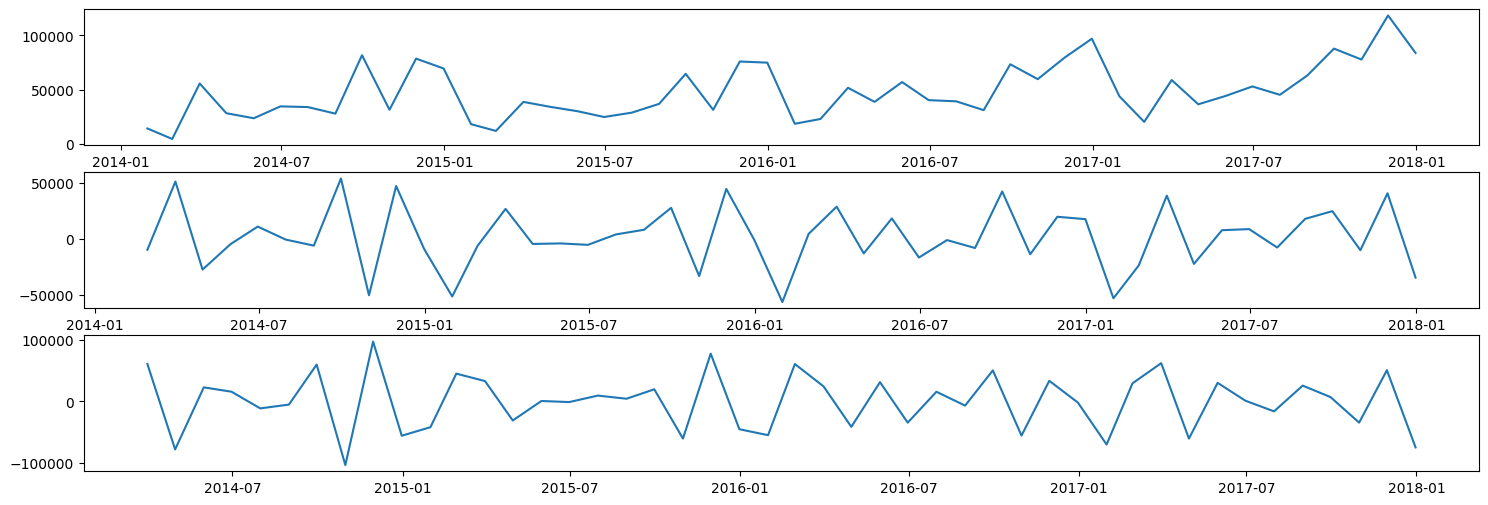

In [13]:
fig = plt.figure(figsize=(18,6))
#original data
ax1 = fig.add_subplot(311)
ax1.plot(monthly_sales['Sales'])

# First-order difference   
ax2 = fig.add_subplot(312)
ax2.plot(monthly_sales['diff_1'])

#Second-order difference
ax3 = fig.add_subplot(313)
ax3.plot(monthly_sales['diff_2'])
plt.show()


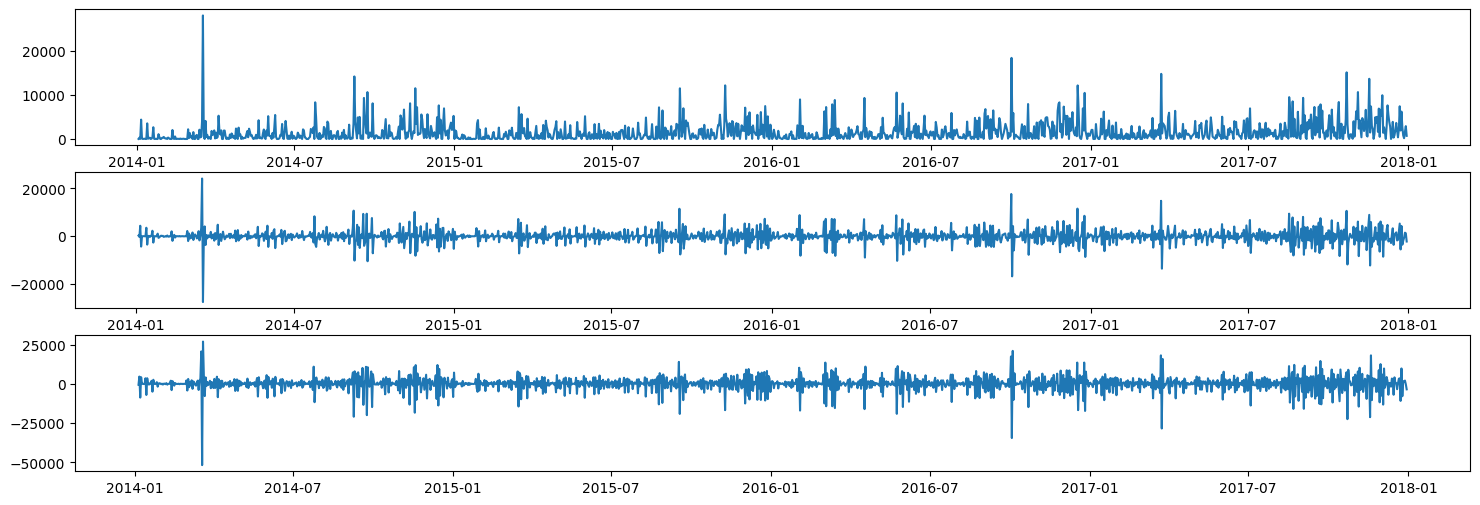

In [14]:
fig = plt.figure(figsize=(18,6))
#original data
ax1 = fig.add_subplot(311)
ax1.plot(daily_sales['Sales'])

#first order diff
ax2 = fig.add_subplot(312)
ax2.plot(daily_sales['diff_1'])

#second order diff
ax3 = fig.add_subplot(313)
ax3.plot(daily_sales['diff_2'])
plt.show()


## Check Stationarity

### ADF Test

In [15]:
from statsmodels.tsa.stattools import adfuller as ADF

#compute ADF for original time series, first order difference time series and second order difference time series
monthly_sales['diff_1'] = monthly_sales['diff_1'].fillna(0)
monthly_sales['diff_2'] = monthly_sales['diff_2'].fillna(0)

daily_sales['diff_1'] = daily_sales['diff_1'].fillna(0)
daily_sales['diff_2'] = daily_sales['diff_2'].fillna(0)

monthly_timeseries_adf = ADF(monthly_sales['Sales'].tolist())
monthly_timeseries_diff1_adf = ADF(monthly_sales['diff_1'].tolist())
monthly_timeseries_diff2_adf = ADF(monthly_sales['diff_2'].tolist())

print(f'monthly_timeseries_adf:{monthly_timeseries_adf} ' )
print(f'monthly_timeseries_diff1_adf:{monthly_timeseries_diff1_adf} ' )
print(f'monthly_timeseries_diff2_adf:{monthly_timeseries_diff2_adf} ' )

print(monthly_timeseries_adf)
print('\nADF = ', str(monthly_timeseries_adf[0])) #more towards negative value the better
print('\np-value = ', str(monthly_timeseries_adf[1]))
print('\nCritical Values: ')

for key, val in monthly_timeseries_adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    

    if monthly_timeseries_adf[0] < val:
        print('Null Hypothesis Rejected. Monthly Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Monthly Time Series is not Stationary')

monthly_timeseries_adf:(-4.493767844002665, 0.00020180198458237758, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 848.774903223632) 
monthly_timeseries_diff1_adf:(-8.557928141088544, 8.854961117466592e-14, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 821.6622612571664) 
monthly_timeseries_diff2_adf:(-6.049160426984672, 1.2900064821354428e-07, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 837.5398500015131) 
(-4.493767844002665, 0.00020180198458237758, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 848.774903223632)

ADF =  -4.493767844002665

p-value =  0.00020180198458237758

Critical Values: 
1% : -3.5778480370438146
Null Hypothesis Rejected. Monthly Time Series is Stationary
5% : -2.925338105429433
Null Hypothesis Rejected. Monthly Time Series is Stationary
10% : -2.6007735310095064
Null Hypothesis Rejecte

In [16]:
daily_timeseries_adf = ADF(daily_sales['Sales'].tolist())
daily_timeseries_diff1_adf = ADF(daily_sales['diff_1'].tolist())
daily_timeseries_diff2_adf = ADF(daily_sales['diff_2'].tolist())

print(f'daily_timeseries_adf:{daily_timeseries_adf} ' )
print(f'daily_timeseries_diff1_adf:{daily_timeseries_diff1_adf} ' )
print(f'daily_timeseries_diff2_adf:{daily_timeseries_diff2_adf} ' )

print(daily_timeseries_adf)
print('\nADF = ', str(daily_timeseries_adf[0])) #more towards negative value the better
print('\np-value = ', str(daily_timeseries_adf[1]))
print('\nCritical Values: ')

for key, val in daily_timeseries_adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    

    if daily_timeseries_adf[0] < val:
        print('Null Hypothesis Rejected. Daily Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Daily Time Series is not Stationary')

daily_timeseries_adf:(-4.939878803531309, 2.9148790727674486e-05, 20, 1437, {'1%': -3.434908816804013, '5%': -2.863553406963303, '10%': -2.5678419239852994}, 26057.64458541891) 
daily_timeseries_diff1_adf:(-14.332889088794502, 1.0922847572512025e-26, 19, 1438, {'1%': -3.4349056408696814, '5%': -2.863552005375758, '10%': -2.5678411776130114}, 26080.40512670052) 
daily_timeseries_diff2_adf:(-17.096142261629183, 7.532121604856332e-30, 24, 1433, {'1%': -3.434921564946909, '5%': -2.8635590328954197, '10%': -2.567844919904611}, 26196.58104552917) 
(-4.939878803531309, 2.9148790727674486e-05, 20, 1437, {'1%': -3.434908816804013, '5%': -2.863553406963303, '10%': -2.5678419239852994}, 26057.64458541891)

ADF =  -4.939878803531309

p-value =  2.9148790727674486e-05

Critical Values: 
1% : -3.434908816804013
Null Hypothesis Rejected. Daily Time Series is Stationary
5% : -2.863553406963303
Null Hypothesis Rejected. Daily Time Series is Stationary
10% : -2.5678419239852994
Null Hypothesis Rejected.

# Monthly_Sales

#### ARIMA_parameter_determination

#### Train test split

In [17]:
train_daily_sales = daily_sales['Sales'].loc['2014-01':'2017-12']
test_daily_sales = daily_sales['Sales'].loc['2017-12':]

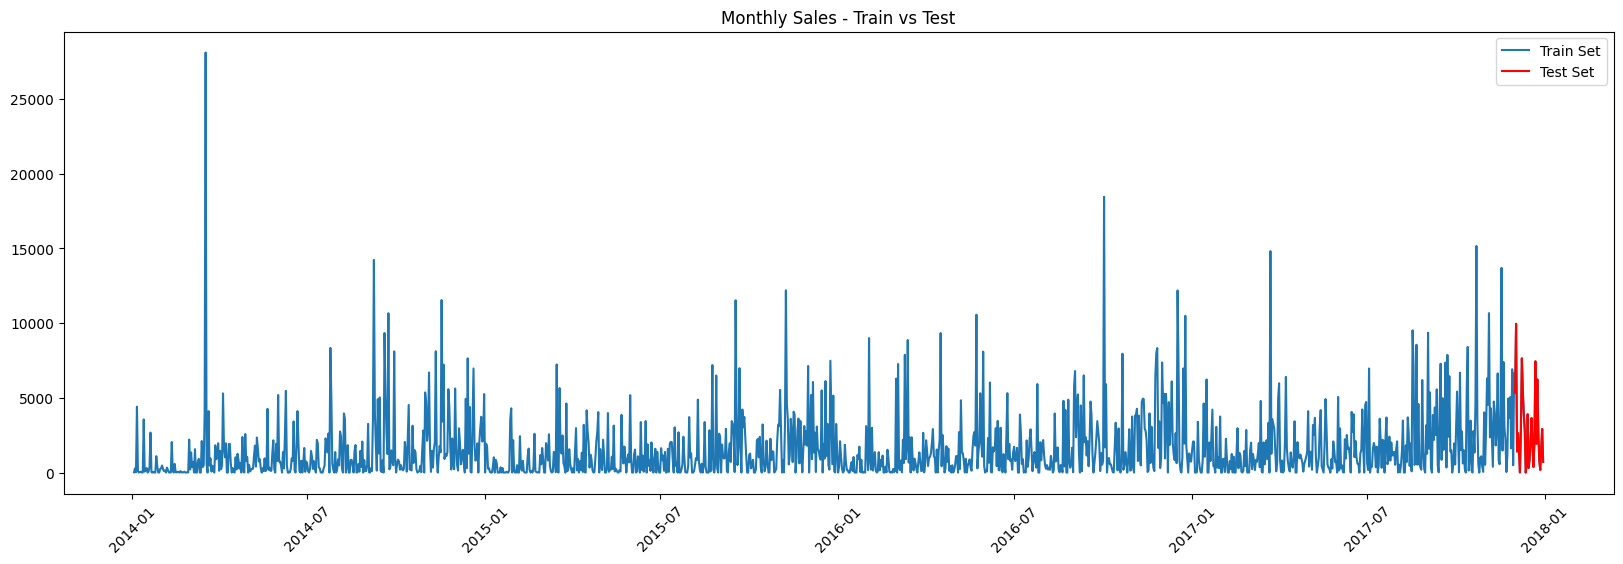

In [18]:
plt.figure(figsize=(20, 6))

plt.plot(daily_sales['Sales'], label='Train Set')
plt.plot(test_daily_sales, color='red', label='Test Set')

plt.xticks(rotation=45)
plt.title('Monthly Sales - Train vs Test')
plt.legend()
plt.show()


In [19]:
train_monthly_sales = monthly_sales['Sales'].loc['2014-01':'2016-12']
test_monthly_sales = monthly_sales['Sales'].loc['2017-01':'2017-12']

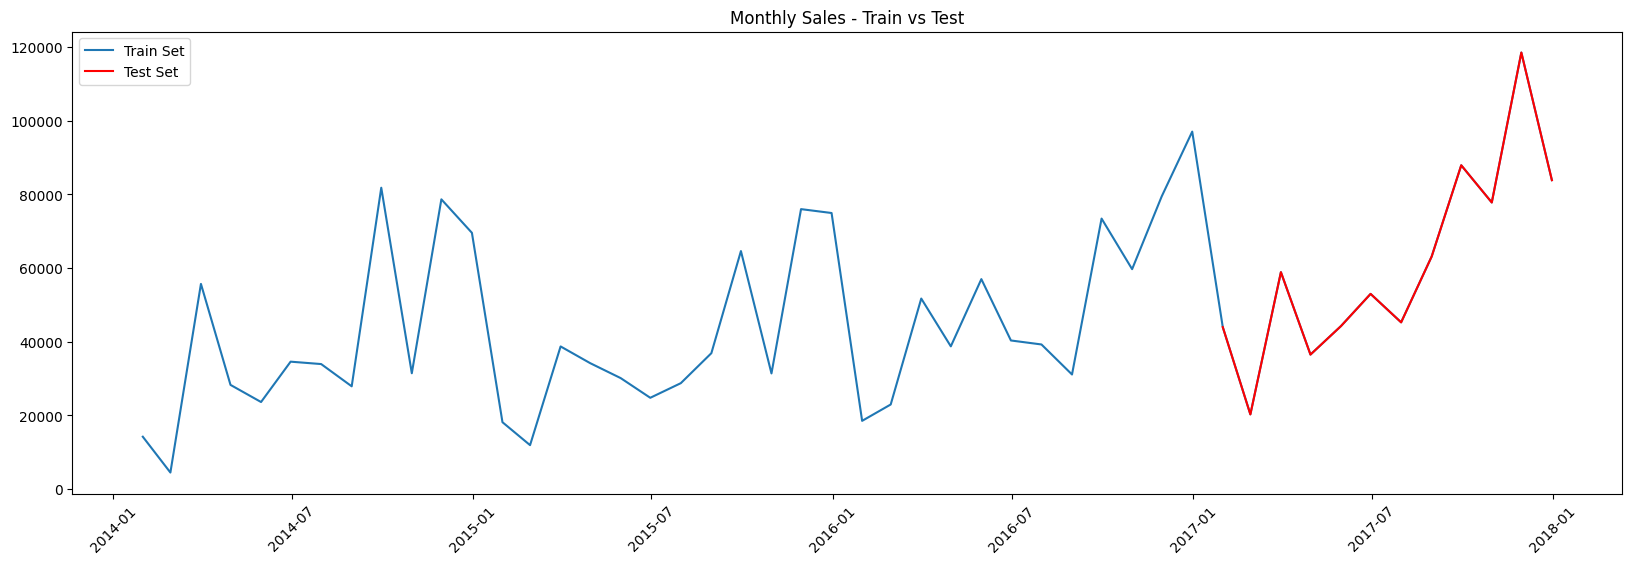

In [20]:
plt.figure(figsize=(20, 6))

plt.plot(monthly_sales['Sales'], label='Train Set')
plt.plot(test_monthly_sales, color='red', label='Test Set')

plt.xticks(rotation=45)
plt.title('Monthly Sales - Train vs Test')
plt.legend()
plt.show()


In [21]:
monthly_sales.shape

(48, 3)

In [22]:
train_daily_sales.shape, test_daily_sales.shape

((1458,), (30,))

In [23]:
train_monthly_sales.shape, test_monthly_sales.shape

((36,), (12,))

#### Analyze based on ACF/PACF plots (perform grid search after determining max_q and max_p).

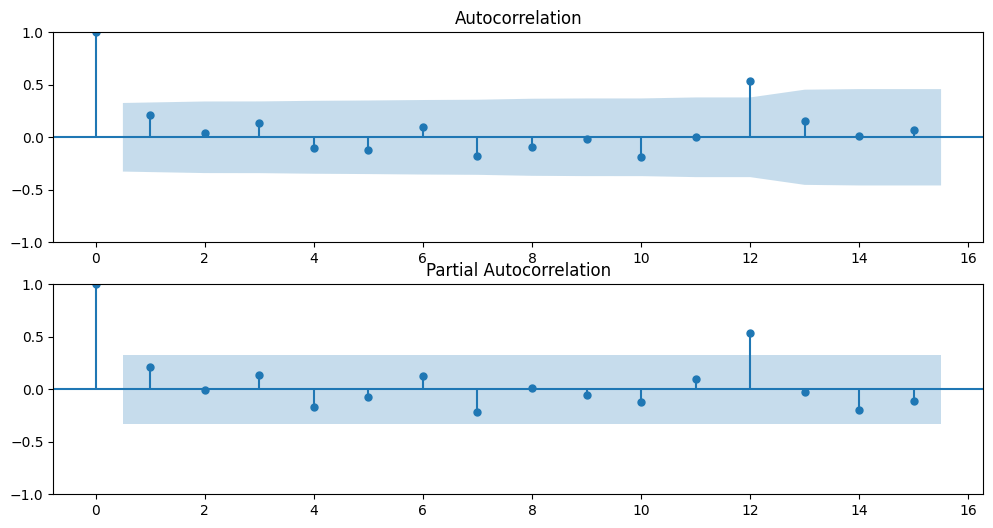

In [24]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_monthly_sales, lags=15, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_monthly_sales, lags=15, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
plt.show()

Through observation:  
ACF cutoff point → suggested max_q:12  
PACF cutoff point → suggested max_p:12


### Get optimal p,q values, automatically select ARIMA parameters

In [25]:
import pmdarima as pm

In [26]:
# Automatically select ARIMA parameters
autoarima_model = pm.auto_arima(train_monthly_sales,
                            seasonal=False,  # Disable seasonality
                            start_p=0, 
                            start_q=0,
                            max_p=12,        # Maximum autoregressive terms
                            max_q=12,        # Maximum moving average terms
                            d=None,         
                            test='adf',     # Use ADF test to determine d
                            trace=True,     # Show search process
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=831.747, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=816.715, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=829.813, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=805.139, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=801.999, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=803.626, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=799.217, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=797.343, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=800.514, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=800.932, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=803.721, Time=0.04 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=796.119, Time=0.13 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=797.571, Time=0.17 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=inf, Time

In [27]:
print("Best ARIMA parameters:", autoarima_model.order)
print(autoarima_model.summary())

Best ARIMA parameters: (3, 2, 2)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -391.060
Date:                Wed, 30 Apr 2025   AIC                            796.119
Time:                        01:18:18   BIC                            806.804
Sample:                    01-31-2014   HQIC                           799.763
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1865.6457   3525.759      0.529      0.597   -5044.714    8776.006
ar.L1         -1.5055      0.228     -6.590      0.000      -1.953      -1.058
ar.L2         -0.98

### ARIMA Modeling

In [28]:
autoarima_model.order

(3, 2, 2)

#### ARIMA Visualization Results

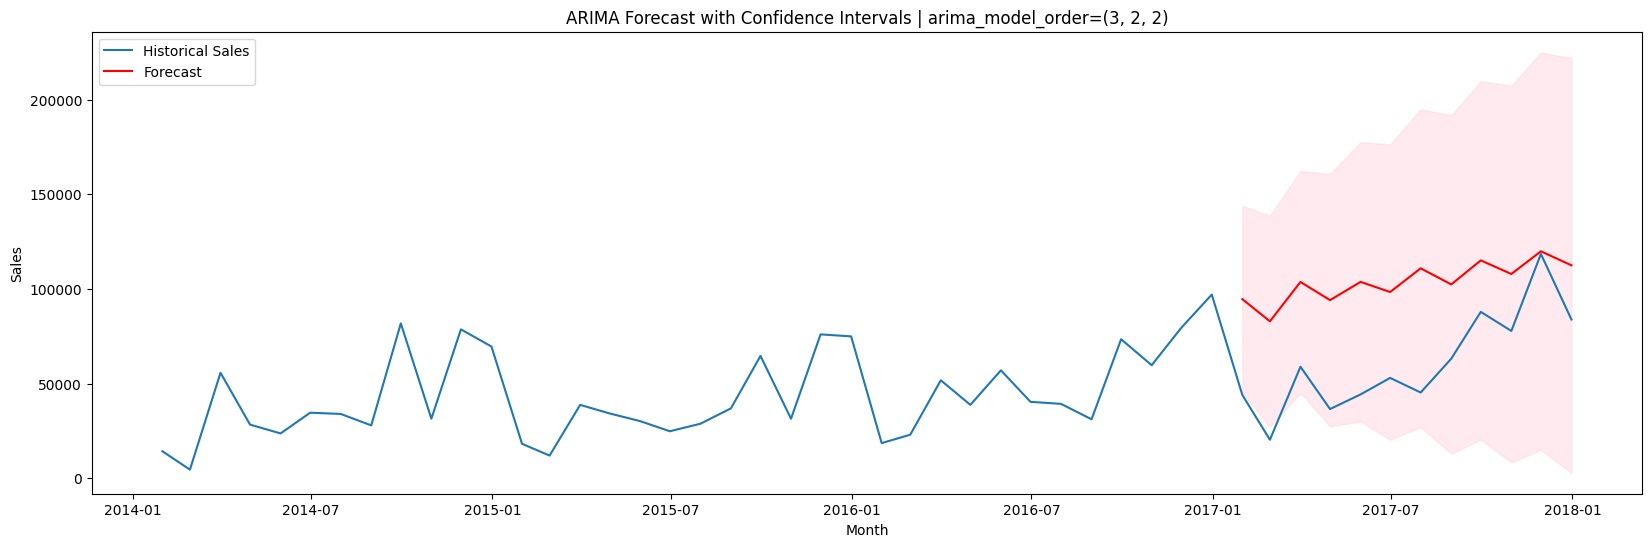

In [29]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_monthly_sales, order=(3, 2, 2))
arima_results = arima_model.fit()
forecast_steps = 12
forecast = arima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int(alpha=0.05)
forecast_index = pd.date_range(start=train_monthly_sales.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('ARIMA Forecast with Confidence Intervals | arima_model_order=(3, 2, 2)')
plt.legend()
plt.show()

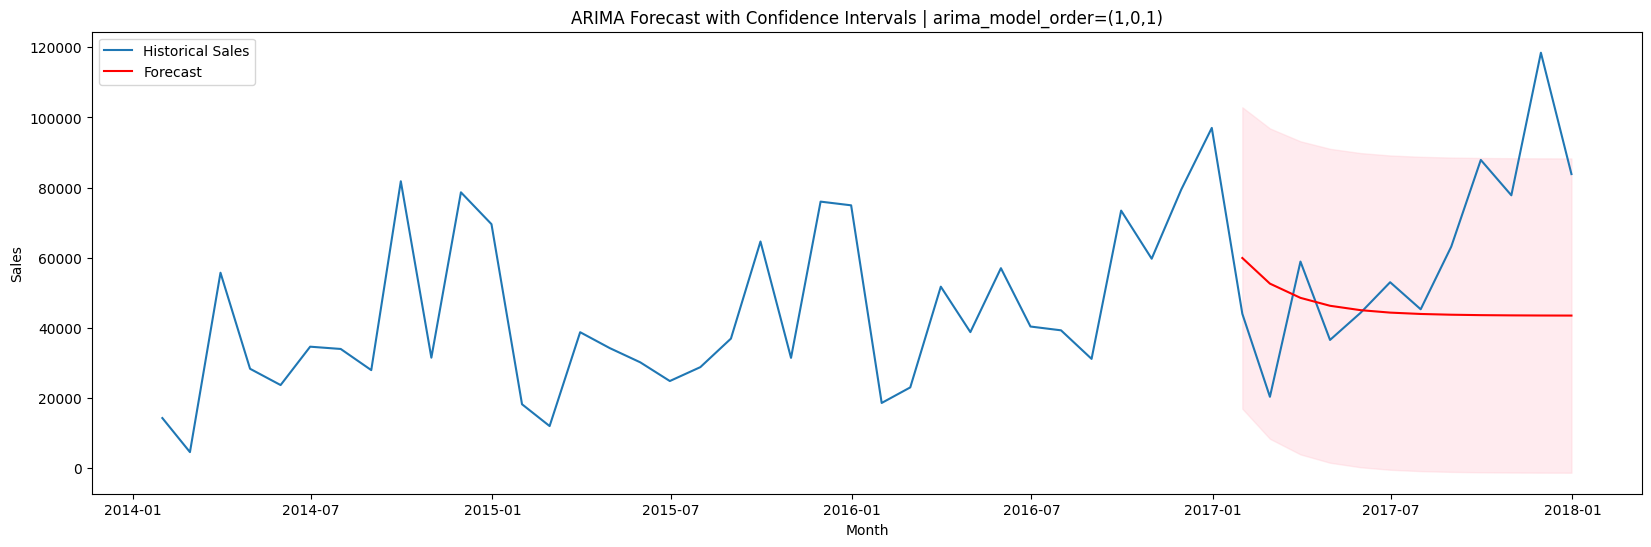

In [30]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_monthly_sales, order=(1, 0, 1))
arima_results = arima_model.fit()
forecast_steps = 12
forecast = arima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int(alpha=0.05)
forecast_index = pd.date_range(start=train_monthly_sales.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('ARIMA Forecast with Confidence Intervals | arima_model_order=(1,0,1)')
plt.legend()
plt.show()

d:\Learning\AI\StudyinHSU\Semester2\COM6101\GroupProject_env\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


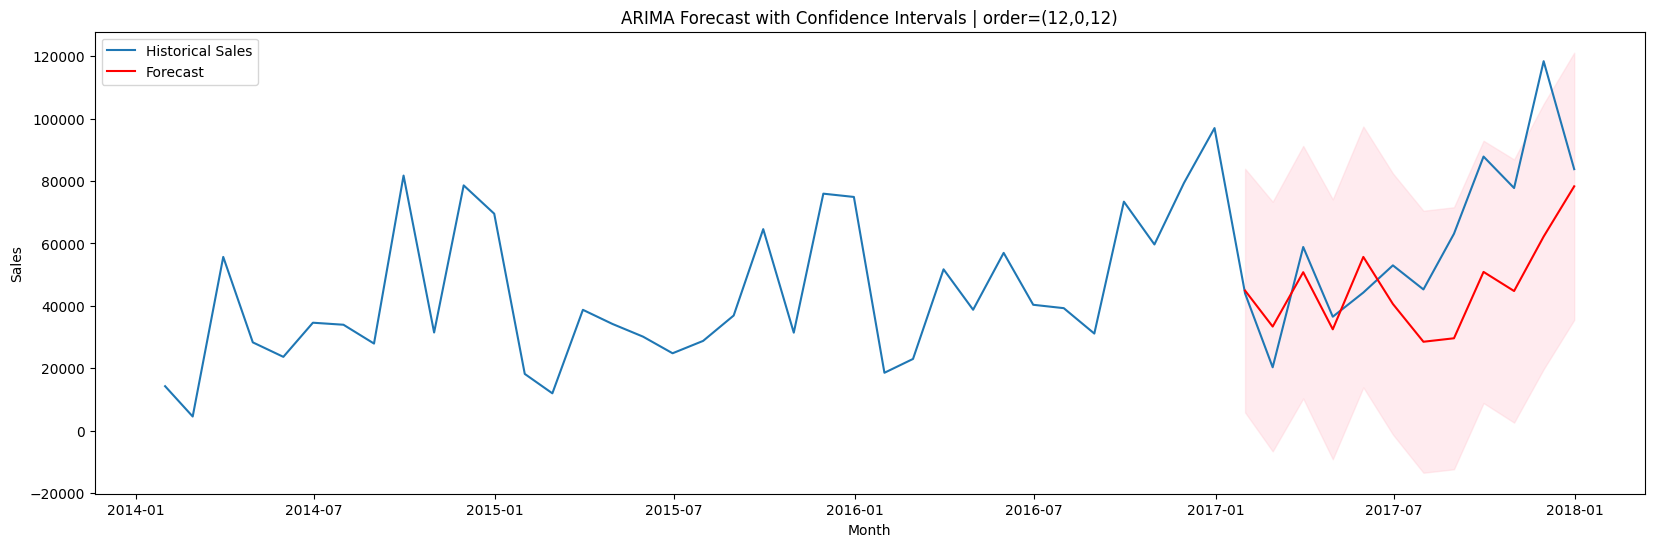

In [31]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_monthly_sales,order=(12,0,12))
arima_results = arima_model.fit()
forecast_steps = 12
forecast = arima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int(alpha=0.05)
forecast_index = pd.date_range(start=train_monthly_sales.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('ARIMA Forecast with Confidence Intervals | order=(12,0,12)')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# In-sample evaluation (training set)
train_pred = arima_results.get_prediction().predicted_mean

train_mae = mean_absolute_error(train_monthly_sales, train_pred)
train_rmse = np.sqrt(mean_squared_error(train_monthly_sales, train_pred))



# Out-of-sample evaluation (test set)
test_pred = arima_results.get_forecast(steps=len(test_monthly_sales)).predicted_mean
test_mae = mean_absolute_error(test_monthly_sales, test_pred)
test_rmse = np.sqrt(mean_squared_error(test_monthly_sales, test_pred))


#### ARIMA-RMSE

In [33]:
print(f"""
Training Set Evaluation:
MAE: {train_mae:.2f}
RMSE: {train_rmse:.2f}

Test Set Evaluation:
MAE: {test_mae:.2f}
RMSE: {test_rmse:.2f}
""")


Training Set Evaluation:
MAE: 12086.09
RMSE: 14834.15

Test Set Evaluation:
MAE: 19327.88
RMSE: 25151.81



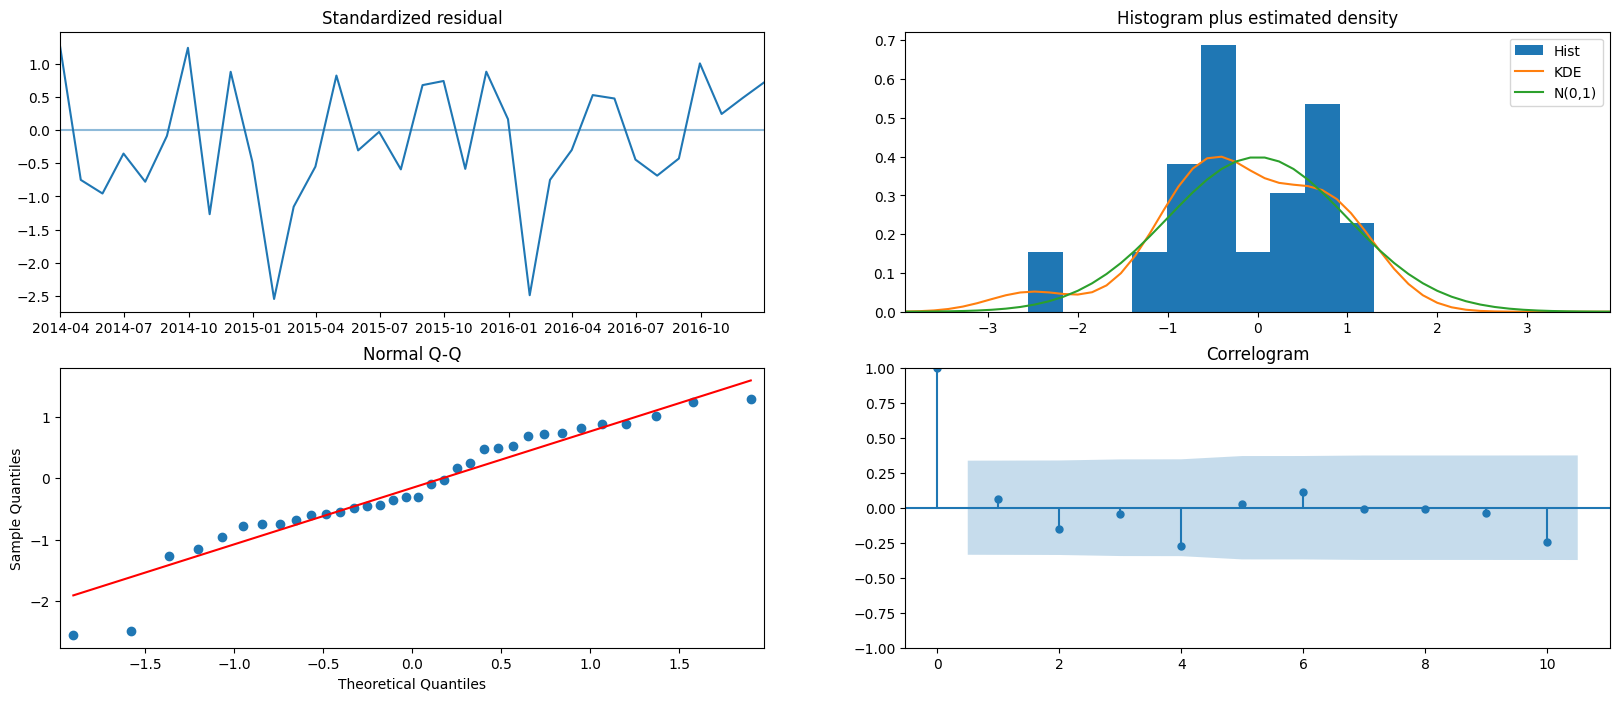

In [34]:
# 可视化诊断图
autoarima_model.plot_diagnostics(figsize=(20, 8))
plt.show()

The residuals show periodic fluctuations (seasonal parameters need to be added) (switch to SARIMA model)

Reference Criteria:

Standardized Residuals (Top Left):  
✅ Ideal Case: Residuals randomly distributed around 0, no obvious trend/periodicity  
❌ Abnormal Case: Presence of upward/downward trend (need to increase differencing order d) or periodic fluctuations (need to add seasonal parameters)

Residual Distribution (Top Right):  
✅ Ideal Case: Histogram roughly coincides with N(0,1) curve (red line), KDE (Kernel Density Estimation) curve roughly coincides with N(0,1) (standard normal distribution) curve  
❌ Abnormal Case: Presence of bimodal/skewed distribution (need to check outliers or transform data)

Normal Q-Q Plot (Bottom Left):  
✅ Ideal Case: Points distributed along the red diagonal line  
❌ Abnormal Case: Ends deviate from diagonal line (residuals show heavy-tailed phenomenon)

Autocorrelation Plot (Bottom Right):  
✅ Ideal Case: ACF values for all lags within blue confidence interval (p>0.05)  
❌ Abnormal Case: First few lags exceed interval (need to increase q value)


### Using SARIMA Model (Adding Seasonal Parameters)

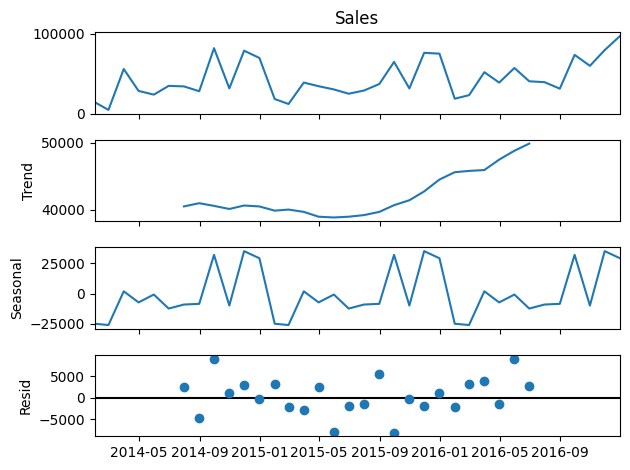

Seasonal ADF p-value when D=0: 0.001
Final determined D value: 0


In [35]:
# Visualize seasonal patterns of the original sequence
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train_monthly_sales, model='additive', period=12)
result.plot()
plt.show()

# Automatically determine D value
def determine_D(series, m, max_D=2):
    for D in range(0, max_D+1):
        if D == 0:
            current = series
        else:
            current = series.diff(m).dropna()
            for _ in range(D-1):
                current = current.diff(m).dropna()
                
        p_value = ADF(current)[1]
        print(f'Seasonal ADF p-value when D={D}: {p_value:.3f}')
        if p_value < 0.05:
            return D
    return max_D

D = determine_D(train_monthly_sales, m=12)
print(f'Final determined D value: {D}')

In [36]:
# Determine seasonal period s (based on data characteristics)
# Common period for monthly data: 12 (yearly seasonality)
s = 12  # yearly seasonality


# Use grid search to find the best parameter combination

# Parameter settings explanation
sarima_model = pm.auto_arima(train_monthly_sales,
                      seasonal=True,  # Enable seasonality (periodic pattern found through ACF)
                      m=s,           # Period s=12 months (determined by data characteristics)
                      start_p=0,     # Minimum autoregressive order
                      max_p=12,      # Based on ACF cutoff near lag 10 + safety margin
                      start_q=0,
                      max_q=12,      # Symmetric setting with p
                      d=0,           # ADF test p<0.05, no regular differencing needed
                      D=1,           # Seasonal differencing eliminates periodic fluctuations
                      start_P=0,
                      max_P=2,       # Seasonal autoregressive terms usually small
                      max_Q=2,       # Limit on seasonal moving average terms
                      trace=True,
                      stepwise=True) # Stepwise search for efficiency

print("Best SARIMA parameters:", sarima_model.order,sarima_model.seasonal_order )
print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=516.312, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=520.458, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=518.641, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=517.094, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=523.189, Time=0.01 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=517.554, Time=0.11 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=515.742, Time=0.06 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=517.047, Time=0.18 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=518.110, Time=0.10 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=516.958, Time=0.08 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=516.167, Time=0.24 sec
 ARIMA(0,0,0)(0,1,2)[12]             : AIC=516.926, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,1,2)[12] intercept
Total fit time: 0.967 seconds
Best SARIMA parameters: (0, 0, 0) (0, 1, 2, 12)
                                   SARI

### SARIMA Modeling

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#ARIMA(1,0,0)(0,0,2)[12]
p, d, q = 1, 0, 0  
P, D, Q, S = 0, 1, 2, 12 
sarima_model = SARIMAX(train_monthly_sales, 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit()

In [38]:
forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [39]:
forecast_index = pd.date_range(start=train_monthly_sales.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')

#### SARIMA Visualization Results

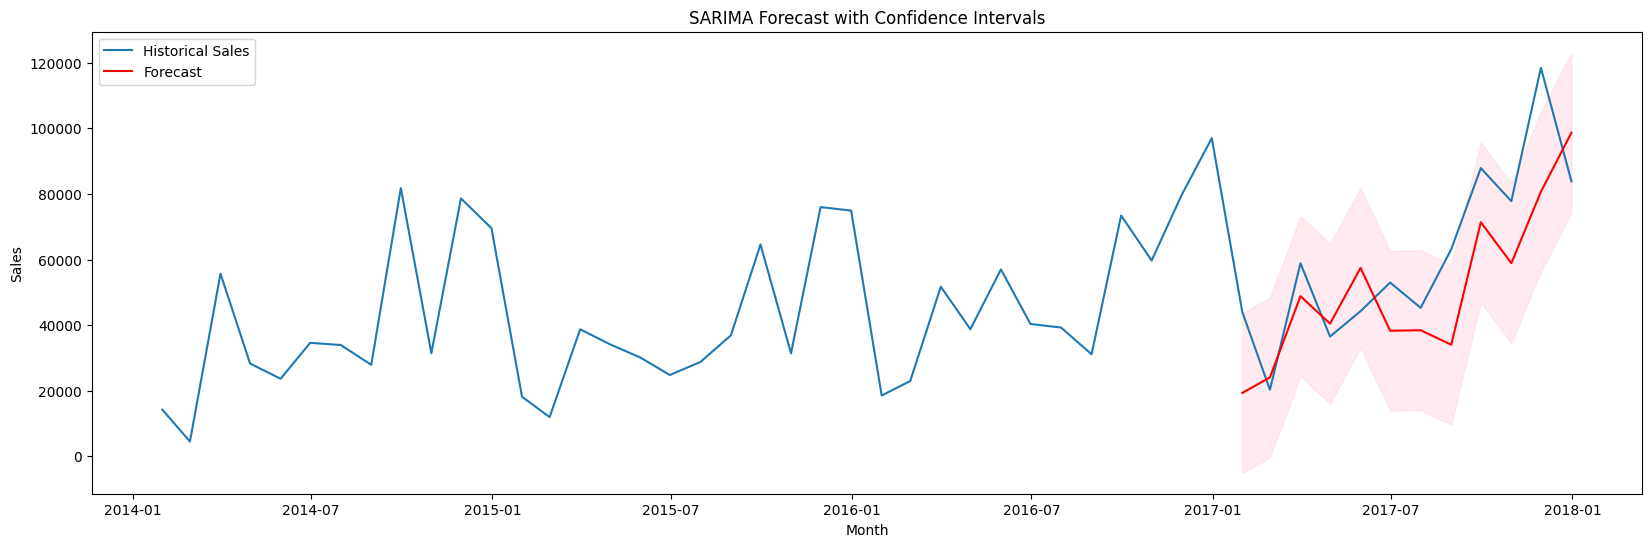

In [40]:
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('SARIMA Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

train_pred = sarima_results.get_prediction().predicted_mean

train_mae = mean_absolute_error(train_monthly_sales, train_pred)
train_rmse = np.sqrt(mean_squared_error(train_monthly_sales, train_pred))


test_pred = sarima_results.get_forecast(steps=len(test_monthly_sales)).predicted_mean
test_mae = mean_absolute_error(test_monthly_sales, test_pred)
test_rmse = np.sqrt(mean_squared_error(test_monthly_sales, test_pred))



#### SARIMA-RMSE

In [42]:
print(f"""
Training Set Evaluation:
MAE: {train_mae:.2f}
RMSE: {train_rmse:.2f}

Test Set Evaluation:
MAE: {test_mae:.2f}
RMSE: {test_rmse:.2f}
""")


Training Set Evaluation:
MAE: 19575.12
RMSE: 29175.71

Test Set Evaluation:
MAE: 16183.11
RMSE: 18926.47



## LSTM Modeling

In [43]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [44]:
monthly_sales.head()

,Sales,diff_1,diff_2
Order Date,,,
2014-01-31,14236.895,0.000,0.000
2014-02-28,4519.892,-9717.003,0.000
2014-03-31,55691.009,51171.117,60888.120
2014-04-30,28295.345,-27395.664,-78566.781
2014-05-31,23648.287,-4647.058,22748.606


In [45]:
# Step 1: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
monthly_sales['value_scaled'] = scaler.fit_transform(monthly_sales[['Sales']])


In [46]:
# 2. Create sequence data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# 3. Set sequence length and split point
seq_length = 12  # Use past 12 months to predict next month
train_size = 36  # First 36 months as training data

# 4. Prepare training data
train_data = monthly_sales['value_scaled'][:train_size]
test_data = monthly_sales['value_scaled'][train_size:]

# 5. Create sequences
X_train, y_train = create_sequences(train_data, seq_length)


# 6. Reshape into format required by LSTM (batch_size, seq_length, input_size)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# y_train = y_train.reshape((y_train.shape[0], 1))

# Convert data to tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)


In [47]:
X_train.shape, y_train.shape

(torch.Size([24, 12, 1]), torch.Size([24]))

In [48]:
import random

def set_seed(seed=42):
    """Set all random seeds for reproducibility"""
    
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # torch.cuda.manual_seed_all(seed)  # if using multi-GPU
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False


In [49]:
# Step 2: Define the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, 
                            hidden_size=hidden_size, 
                            num_layers=num_layers, 
                            batch_first=True)
        
        self.dropout = nn.Dropout(dropout_rate)

        self.fc = nn.Linear(hidden_size, 1)  # Output size is 1 for single-step prediction

        
    def forward(self, x):
        out, _ = self.lstm(x)  # out: (batch_size, seq_length, hidden_size)
        out = out[:, -1]  # Take the output of the last time step: (batch_size, hidden_size)
        out = self.dropout(out)
        pred = self.fc(out)  # Pass through fully connected layer: (batch_size, 1)
        return pred.squeeze()  # Remove unnecessary dimensions: (batch_size)


In [50]:
## EarlyStopping
class EarlyStopping:
    def __init__(self, patience=5, min_delta=1e-4, verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None
        
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0
            
    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}). Saving model...')
        self.best_model_state = model.state_dict()

### LSTM Training

In [51]:
# Step 3: Define hyperparameters, loss function, and optimizer
input_size = 1  # Single variable
hidden_size = 50  # Number of LSTM units
num_layers = 2  #  LSTM layer
num_epochs = 1000  # Number of training epochs
learning_rate = 0.01  # Learning rate
dropout_rate=0.1

set_seed(42)

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size=input_size, 
                  hidden_size=hidden_size, 
                  num_layers=num_layers,
                  dropout_rate=dropout_rate)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



In [52]:
print(model)

LSTMModel(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [53]:
# Step 5: Train the model
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute loss

    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [20/1000], Loss: 0.0399
Epoch [40/1000], Loss: 0.0404
Epoch [60/1000], Loss: 0.0366
Epoch [80/1000], Loss: 0.0397
Epoch [100/1000], Loss: 0.0386
Epoch [120/1000], Loss: 0.0371
Epoch [140/1000], Loss: 0.0335
Epoch [160/1000], Loss: 0.0285
Epoch [180/1000], Loss: 0.0121
Epoch [200/1000], Loss: 0.0065
Epoch [220/1000], Loss: 0.0064
Epoch [240/1000], Loss: 0.0058
Epoch [260/1000], Loss: 0.0060
Epoch [280/1000], Loss: 0.0034
Epoch [300/1000], Loss: 0.0020
Epoch [320/1000], Loss: 0.0012
Epoch [340/1000], Loss: 0.0010
Epoch [360/1000], Loss: 0.0026
Epoch [380/1000], Loss: 0.0010
Epoch [400/1000], Loss: 0.0006
Epoch [420/1000], Loss: 0.0008
Epoch [440/1000], Loss: 0.0005
Epoch [460/1000], Loss: 0.0006
Epoch [480/1000], Loss: 0.0009
Epoch [500/1000], Loss: 0.0003
Epoch [520/1000], Loss: 0.0005
Epoch [540/1000], Loss: 0.0009
Epoch [560/1000], Loss: 0.0003
Epoch [580/1000], Loss: 0.0004
Epoch [600/1000], Loss: 0.0003
Epoch [620/1000], Loss: 0.0003
Epoch [640/1000], Loss: 0.0006
Epoch [660/1

### LSTM One-Time Prediction

In [54]:
# Prepare test sequence
# Use last 12 training data points to predict first test point
test_input_data = monthly_sales['value_scaled'][train_size-seq_length:train_size+12]  # Get last 12 training points and all test points
X_test, y_test = create_sequences(test_input_data, seq_length)

# Reshape test data into format required by LSTM
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test = torch.tensor(X_test, dtype=torch.float32)

In [55]:
# Step 5: Model testing
model.eval()
with torch.no_grad():
    test_monthly_sales_predictions_scaled = model(X_test).squeeze().numpy()

test_monthly_sales_predictions = scaler.inverse_transform(test_monthly_sales_predictions_scaled.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

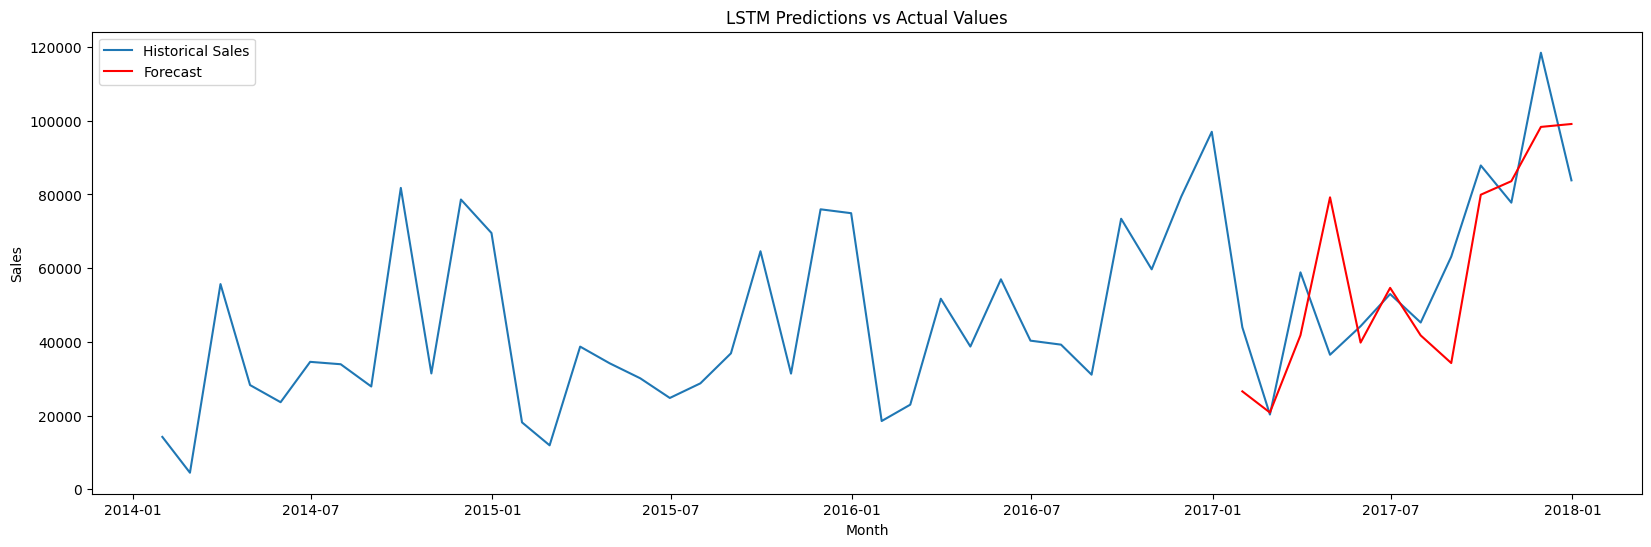

In [56]:
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, pd.Series(test_monthly_sales_predictions,index=forecast_df.index), label='Forecast', color='red')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('LSTM Predictions vs Actual Values')
plt.legend()
plt.show()

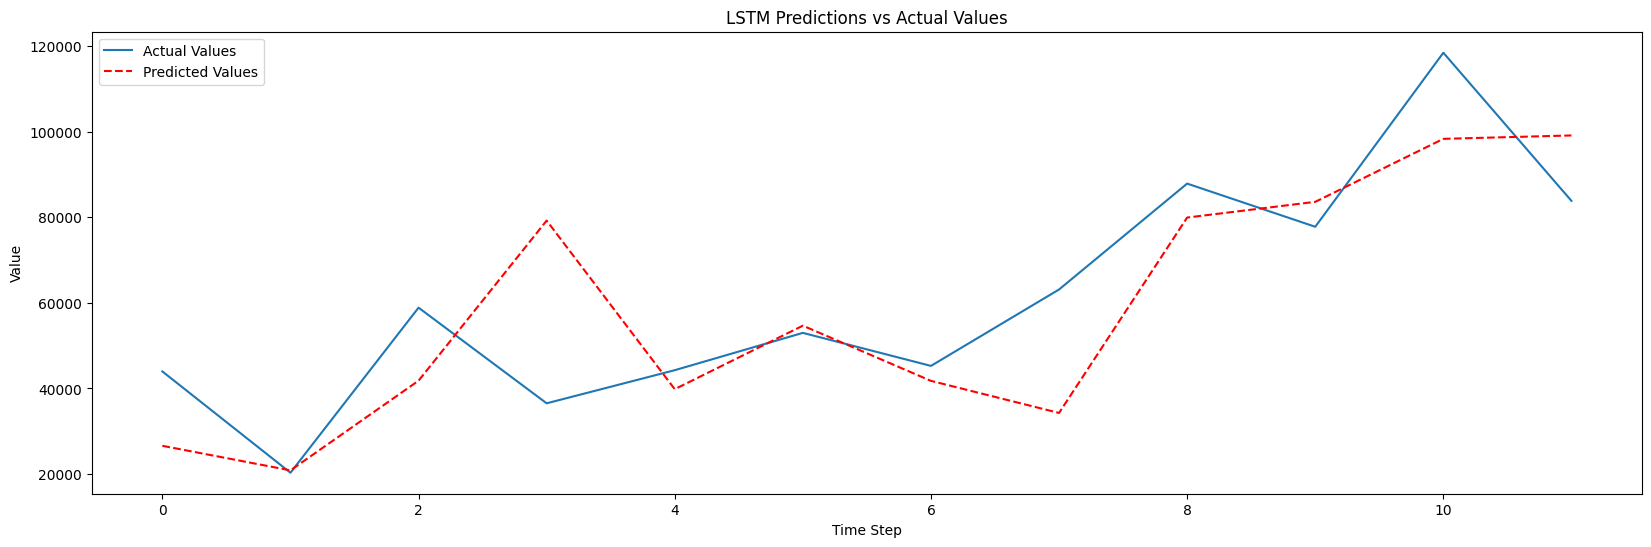

In [57]:
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(test_monthly_sales_predictions, label='Predicted Values', color='red', linestyle='--')
plt.title('LSTM Predictions vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

#### LSTM_RMSE

In [58]:
# In-sample evaluation (Training set)
model.eval()
with torch.no_grad():
    train_monthly_sales_predictions_scaled = model(X_train).squeeze().numpy()

train_monthly_sales_predictions = scaler.inverse_transform(train_monthly_sales_predictions_scaled.reshape(-1, 1)).flatten()
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

train_mae = mean_absolute_error(y_train, train_monthly_sales_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_monthly_sales_predictions))


# Out-of-sample evaluation (Test set)
test_mae = mean_absolute_error(y_test, test_monthly_sales_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_monthly_sales_predictions))




print(f"""
Training Set Evaluation:
MAE: {train_mae:.2f}
RMSE: {train_rmse:.2f}

Test Set Evaluation:
MAE: {test_mae:.2f}
RMSE: {test_rmse:.2f}
""")


Training Set Evaluation:
MAE: 405.03
RMSE: 525.67

Test Set Evaluation:
MAE: 13778.41
RMSE: 18302.54

